##### <br />
<br />

# Assignment 3





In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

##  Hyperparameter tuning for penalized regression

Consider the data and ridge regression algorithm with 20-degree polynomials as in the class. Tune the hyperparameter $\alpha$ using $K$-fold cross validation based on the $R^2$ measure. The steps would be similar to what we did with classifiers:

### 1) Load the datafile `Regression_Exercise_dataset.dat`

In [2]:
data = np.loadtxt('Regression_Exercise_dataset.dat')
print(data.shape)

(50, 2)


### 2) Split out test data

In [3]:
Y_origin = data[:,0]    # all rows, first column
X_origin = data[:,1]   # all rows, second column

X, X_test, Y, Y_test = train_test_split(
        X_origin,Y_origin,test_size=0.2,
        shuffle=False)


### 3) Choose hyperparameter $\alpha$ for ridge regression using 4-fold cross validation

`score()` method of `Ridge` and `Lasso` gives you the coefficient of determination ($R^2$).

In [4]:
### method 1
from sklearn.model_selection import RepeatedKFold
from sklearn.linear_model import RidgeCV

In [5]:
cva = RepeatedKFold(n_splits=10,n_repeats = 3, random_state=42)
model = RidgeCV(alphas=np.arange(0.001,1,.01), cv=cva)
X = X.reshape( (X.shape[0], 1 )) 
model.fit(X,Y)

RidgeCV(alphas=array([0.001, 0.011, 0.021, 0.031, 0.041, 0.051, 0.061, 0.071, 0.081,
       0.091, 0.101, 0.111, 0.121, 0.131, 0.141, 0.151, 0.161, 0.171,
       0.181, 0.191, 0.201, 0.211, 0.221, 0.231, 0.241, 0.251, 0.261,
       0.271, 0.281, 0.291, 0.301, 0.311, 0.321, 0.331, 0.341, 0.351,
       0.361, 0.371, 0.381, 0.391, 0.401, 0.411, 0.421, 0.431, 0.441,
       0.451, 0.461, 0.471, 0.481, 0.491, 0.501, 0.511, 0.521, 0.531,
       0.541, 0.551, 0.561, 0.571, 0.581, 0.591, 0.601, 0.611, 0.621,
       0.631, 0.641, 0.651, 0.661, 0.671, 0.681, 0.691, 0.701, 0.711,
       0.721, 0.731, 0.741, 0.751, 0.761, 0.771, 0.781, 0.791, 0.801,
       0.811, 0.821, 0.831, 0.841, 0.851, 0.861, 0.871, 0.881, 0.891,
       0.901, 0.911, 0.921, 0.931, 0.941, 0.951, 0.961, 0.971, 0.981,
       0.991]),
        cv=RepeatedKFold(n_repeats=3, n_splits=10, random_state=42))

In [6]:
print(model.alpha_)

0.9909999999999999


In [55]:
y_pred = model.predict(X_test.reshape(-1,1))
mse = np.mean((y_pred-Y_test)**2)
print(mse)

1.2388908517962718


In [9]:
### Method 2
def getPoly(myArray,degree):
    
    result = np.zeros((myArray.shape[0],degree))
    for j in range(degree):
        result[:,j] = myArray.ravel()**(j+1)
    return result
X_poly = getPoly(X,degree=20)
X_poly.shape

(40, 20)

In [10]:
X = X.reshape( (X.shape[0], 1 )) 
X_train, X_valid, Y_train, Y_valid = train_test_split( 
        X,Y, test_size=0.33, shuffle=False)
print("Shape of the train dataset: ", X_train.shape)
print("Shape of the validation dataset: ", X_valid.shape)
from sklearn.linear_model import Ridge
from sklearn.model_selection import KFold

kf = KFold(n_splits=4)

for train_index, valid_index in kf.split( X ):
    X_train_kfold = X[train_index]
    X_valid_kfold  = X[valid_index]
    Y_train_kfold = Y[train_index]
    Y_valid_kfold  = Y[valid_index]

Y.shape

Shape of the train dataset:  (26, 1)
Shape of the validation dataset:  (14, 1)


(40,)

In [56]:
### Method 2: I got errors from the shape of arrays
# from sklearn.model_selection import cross_val_score
# alpha_range = range (1,100)
# for alpha in alpha_range:
#     model_ridge = Ridge( alpha = alpha )
#     model_ridge.fit( X_poly , Y )
#     loss=cross_val_score(model_ridge,X , Y, cv=4,scoring=model_ridge.score)

# plt.plot(X, Y, 'o')
# x_array = np.linspace(0,1,100)
# y_array = model_ridge.predict(x_array)

# x_array = x_array.reshape( (x_array.shape[0], 1 )) 
# y_array = y_array.reshape( (y_array.shape[0], 1 )) 

# plt.plot(x_array, y_array, 'r-')

# plt.xlabel('X')
# plt.ylabel('Y')
# plt.show()

### 4) Choose hyperparameter $\alpha$ for lasso regression using 4-fold cross validation

In [13]:
from sklearn.linear_model import LassoCV
cva = RepeatedKFold(n_splits=10,n_repeats = 3, random_state=42)
model_lasso = LassoCV(alphas=np.arange(0.001,1,.01), cv=cva)
X = X.reshape( (X.shape[0], 1 )) 
model_lasso.fit(X,Y)
print(model_lasso.alpha_)

0.001


### 5) Compare the final performance of the two with the test set.

In [28]:
# using test set??
from sklearn.model_selection import cross_val_score
ridge = Ridge(model.alpha_)
cross_val_score(ridge, X_test, Y_test, cv=4)

array([-4.14086082e-01,  2.16548836e-01, -1.62580658e+02, -7.72755010e-02])

In [29]:
X_test = X_test.reshape( (X_test.shape[0], 1 )) 
Y_test = Y_test.reshape( (Y_test.shape[0], 1 )) 
model.score(X_test, Y_test)

0.6278354343645123

In [30]:
y_pred = model_lasso.predict(X_test.reshape(-1,1))
mse = np.mean((y_pred-Y_test)**2)
print(mse)

1.357317493142129


In [31]:
Lasso(alpha=0.5, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=False, random_state=None, solver='auto', tol=0.001)
lasso = Lasso(model_lasso.alpha_)
cross_val_score(lasso, X_test, Y_test, cv=4)

NameError: name 'Lasso' is not defined

## Exercise 4: Principal Component Analysis + K-means clustering

Let's try PCA on the iris dataset.

In [33]:
from sklearn.datasets import load_iris
iris_data = load_iris()

We have 150 samples with four features, 

In [34]:
print( iris_data.data.shape )

(150, 4)


And we have three types of iris: setosa, versicolor, and virginica.

In [35]:
iris_data.target

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [36]:
iris_data.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

### 1) Compute the covariance matrix.

In [37]:
X = iris_data.data
y = iris_data.target

### 2) Fit PCA.

In [39]:
from sklearn.decomposition import PCA
pca = PCA(n_components=4)
pca.fit(X)

PCA(n_components=4)

### 3) How much of the variance is explained by each PC?  Visualize it. What are the principal components? 

[0.92461872 0.05306648 0.01710261 0.00521218]


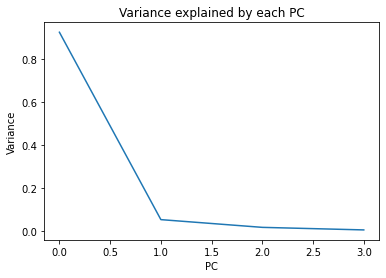

Principle components : 
 [[ 0.36138659 -0.08452251  0.85667061  0.3582892 ]
 [ 0.65658877  0.73016143 -0.17337266 -0.07548102]
 [-0.58202985  0.59791083  0.07623608  0.54583143]
 [-0.31548719  0.3197231   0.47983899 -0.75365743]]


In [42]:
print(pca.explained_variance_ratio_)
# Plot the explained variance
plt.plot(pca.explained_variance_ratio_)
plt.title('Variance explained by each PC')
plt.xlabel('PC')
plt.ylabel('Variance')
plt.show()
print("Principle components : \n",pca.components_)

### 4) Perform the PCA transformation. What is the covariance matrix on the transformed space?

In [48]:
print(np.cov(pca.transform(X).T))

[[4.22824171e+00 7.24425088e-16 2.33571071e-16 4.68874814e-16]
 [7.24425088e-16 2.42670748e-01 8.06095301e-18 2.96300023e-17]
 [2.33571071e-16 8.06095301e-18 7.82095000e-02 5.66739471e-18]
 [4.68874814e-16 2.96300023e-17 5.66739471e-18 2.38350930e-02]]


### 5) Plot the samples on the first two principal components. Use different colors/markers for different kind of iris.

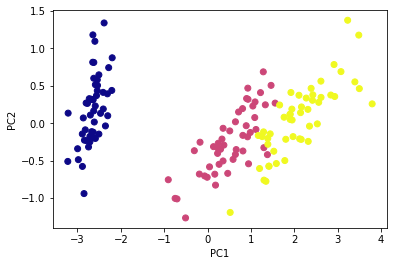

In [51]:
plt.scatter(X_transformed[:, 0], X_transformed[:, 1], c=y, cmap='plasma')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.show()

### 6) Perform K-means clustering with $K=3$ on the PCA-transformed space, and visualize the result using first two principal components.

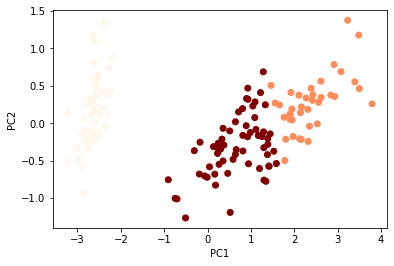

In [54]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=3)
kmeans.fit(X_transformed)
y_pred = kmeans.predict(X_transformed)
plt.scatter(X_transformed[:, 0], X_transformed[:, 1], c=y_pred, cmap='OrRd')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.show()